# **Employee Attrition Analysis: Identifying Organizational and Managerial Drivers of Turnover**
*A Data-Driven Analysis of Human Resources Workforce Data*

**Data Source:**  
https://www.kaggle.com/datasets/rhuebner/human-resources-data-set/data

---

This project analyzes employee attrition using historical human resources data to identify key organizational and managerial drivers of turnover. The analysis aims to uncover actionable insights that can support evidence-based HR policies, improve employee retention, and reduce the risk of talent loss.

The primary focus of this analysis is employee attrition, with particular attention to both **voluntary** and **involuntary** terminations. The following questions guide the exploration:

- What are the most common reasons for employee termination?
- Are there observable patterns in attrition based on:
  - Department
  - Manager
  - Performance score
  - Recruitment source

The project is conducted in several stages. First, the dataset is prepared through library imports, data cleaning, and preprocessing. Next, the data is analyzed descriptively to extract key insights and identify meaningful patterns in attrition. Finally, the findings are translated into data-driven recommendations and potential improvements for future HR policies and analytical work.

**Table of Contents**
1. [Introduction](#employee-attrition-analysis-identifying-organizational-and-managerial-drivers-of-turnover)
2. [Data Preparation](#01-data-preparation)
    1) [Importing Data](#importing-the-libraries-and-the-dataset)
    2) [Handling Missing Data](#handling-the-missing-data)
3. [Attrition Analysis](#02-attrition-analysis)
    1) [Common Reasons](#analysis-1--common-reasons-for-employee-termination)
    2) [Department-Level Analysis](#analysis-2--department-level-attrition-patterns)
    3) [Manager-Level Analysis](#analysis-3--patterns-on-attrition-based-on-manager)
    4) [Performance Score Analysis](#analysis-4--patterns-on-attrition-based-on-performance-score)
    5) [Recruitment Source Analysis](#analysis-5--patterns-on-attrition-based-on-recruitment-source)
4. [Recommendations](#03-recommendations-and-improvements)

# **01 Data Preparation**

## **Importing the Libraries and the Dataset**
To import the data, you can also use `kagglehub`. Just follow the instruction on the Kaggle website. 

In [642]:
import pandas as pd
import matplotlib.pyplot as plt

In [643]:
df = pd.read_csv("HRDataset_v14.csv")
df

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,"Woodson, Jason",10135,0,0,1,1,5,3,0,65893,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,4.07,4,0,2/28/2019,0,13
307,"Ybarra, Catherine",10301,0,0,0,5,5,1,0,48513,...,Brannon Miller,12.0,Google Search,PIP,3.20,2,0,9/2/2015,5,4
308,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
309,"Zhou, Julia",10043,0,0,0,1,3,3,0,89292,...,Simon Roup,4.0,Employee Referral,Fully Meets,5.00,3,5,2/1/2019,0,11


In [644]:
print("The data has", df.shape[0], "rows and", df.shape[1], "columns.")

The data has 311 rows and 36 columns.


In [645]:
print("Below are the columns of the data.")
df.columns

Below are the columns of the data.


Index(['Employee_Name', 'EmpID', 'MarriedID', 'MaritalStatusID', 'GenderID',
       'EmpStatusID', 'DeptID', 'PerfScoreID', 'FromDiversityJobFairID',
       'Salary', 'Termd', 'PositionID', 'Position', 'State', 'Zip', 'DOB',
       'Sex', 'MaritalDesc', 'CitizenDesc', 'HispanicLatino', 'RaceDesc',
       'DateofHire', 'DateofTermination', 'TermReason', 'EmploymentStatus',
       'Department', 'ManagerName', 'ManagerID', 'RecruitmentSource',
       'PerformanceScore', 'EngagementSurvey', 'EmpSatisfaction',
       'SpecialProjectsCount', 'LastPerformanceReview_Date', 'DaysLateLast30',
       'Absences'],
      dtype='object')

## **Handling Missing Data**

At this stage, the dataset is examined to identify missing values that may need to be addressed to ensure the analysis runs smoothly and produces reliable results.

Regarding potential data errors, these will be assessed at the beginning of each analytical section to ensure that any anomalies are identified and handled appropriately before further analysis.

In [646]:
df.isnull().sum().loc[lambda x: x > 0]

DateofTermination    207
ManagerID              8
dtype: int64

There are two types of missing data in this dataset: `DateofTermination` and `ManagerID`.

Missing values in `DateofTermination` indicate that the employee is still active. Conversely, if `DateofTermination` contains a value, the employee is no longer active.

Based on this interpretation, we will only focus on addressing missing values in `ManagerID`.

In [647]:
df[df['ManagerID'].isnull()]

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
19,"Becker, Scott",10277,0,0,1,3,5,3,0,53250,...,Webster Butler,NaN,LinkedIn,Fully Meets,4.20,4,0,1/11/2019,0,13
30,"Buccheri, Joseph",10184,0,0,1,1,5,3,0,65288,...,Webster Butler,NaN,Google Search,Fully Meets,3.19,3,0,2/1/2019,0,9
44,"Chang, Donovan E",10154,0,0,1,1,5,3,0,60380,...,Webster Butler,NaN,LinkedIn,Fully Meets,3.80,5,0,1/14/2019,0,4
88,"Fancett, Nicole",10136,0,0,0,1,5,3,0,65902,...,Webster Butler,NaN,LinkedIn,Fully Meets,4.00,4,0,1/7/2019,0,7
135,"Hutter, Rosalie",10214,0,3,0,2,5,3,0,64995,...,Webster Butler,NaN,Indeed,Fully Meets,4.50,3,0,2/14/2019,0,6
177,"Manchester, Robyn",10077,1,1,0,2,5,3,0,62385,...,Webster Butler,NaN,LinkedIn,Fully Meets,5.00,3,0,1/21/2019,0,4
232,"Rivera, Haley",10011,1,1,0,1,5,4,0,46738,...,Webster Butler,NaN,Google Search,Exceeds,4.36,5,0,2/11/2019,0,16
251,"Sewkumar, Nori",10071,0,0,0,3,5,3,0,50923,...,Webster Butler,NaN,Google Search,Fully Meets,5.00,5,0,2/6/2019,0,14


We see that all of the missing `ManagerID` data are associated with Webster Butler as their `ManagerName`. So, we'll fill those with his ID.

In [648]:
df.loc[
    df['ManagerName'] == 'Webster Butler',
    ['Employee_Name', 'EmpID', 'ManagerName', 'ManagerID']
].head()

,Employee_Name,EmpID,ManagerName,ManagerID
4,"Anderson, Carol",10069,Webster Butler,39.0
19,"Becker, Scott",10277,Webster Butler,NaN
30,"Buccheri, Joseph",10184,Webster Butler,NaN
44,"Chang, Donovan E",10154,Webster Butler,NaN
65,"DeGweck, James",10070,Webster Butler,39.0


In [649]:
df.loc[
    (df['ManagerName'] == 'Webster Butler') & df['ManagerID'].isnull(),
    'ManagerID'
] = df.loc[
    (df['ManagerName'] == 'Webster Butler') & df['ManagerID'].notnull(),
    'ManagerID'
].iloc[0]

In [650]:
df.isnull().sum().loc[lambda x: x > 0]

DateofTermination    207
dtype: int64

At this point, the only variable that contains missing values is `DateofTermination`.

In [651]:
df.loc[
    df['ManagerName'] == 'Webster Butler',
    ['Employee_Name', 'EmpID', 'ManagerName', 'ManagerID']
].head()

,Employee_Name,EmpID,ManagerName,ManagerID
4,"Anderson, Carol",10069,Webster Butler,39.0
19,"Becker, Scott",10277,Webster Butler,39.0
30,"Buccheri, Joseph",10184,Webster Butler,39.0
44,"Chang, Donovan E",10154,Webster Butler,39.0
65,"DeGweck, James",10070,Webster Butler,39.0


# **02 Attrition Analysis**

In this project, we will focus about finding insight from the employee attrition. So, not all of the data from the database will be used in the following part of the analysis.

For this project, the analysis focuses only on the following variables:

- `Employee_Name`
- `EmpID`
- `PerfScoreID`
- `Termd`
- `TermReason`
- `EmploymentStatus`
- `Department`
- `ManagerName`
- `ManagerID`
- `RecruitmentSource`
- `PerformanceScore`

## Analysis 1 — Common Reasons for Employee Termination

The main question in this part of the analysis is: *“What are the most common reasons for employee termination?”*  

To address this question, the analysis focuses on:
- `TermReason`, which describes the primary reason for an employee’s departure, and
- `EmploymentStatus`, which indicates the type of separation—whether the employee left voluntarily or was terminated for cause.

In [652]:
df[["Termd", "TermReason", "EmploymentStatus"]].head()

,Termd,TermReason,EmploymentStatus
0,0,N/A-StillEmployed,Active
1,1,career change,Voluntarily Terminated
2,1,hours,Voluntarily Terminated
3,0,N/A-StillEmployed,Active
4,1,return to school,Voluntarily Terminated


In [653]:
df.loc[
    df['Termd'] == 1,
    ['Termd', 'TermReason', 'EmploymentStatus']
].head()

,Termd,TermReason,EmploymentStatus
1,1,career change,Voluntarily Terminated
2,1,hours,Voluntarily Terminated
4,1,return to school,Voluntarily Terminated
10,1,Another position,Voluntarily Terminated
11,1,unhappy,Voluntarily Terminated


Next, the analysis examines which type of termination occurs more frequently and the proportion each termination type contributes to overall employee separations.

In [654]:
terminated = df[df['Termd'] == 1].copy()

summary = (
    terminated['EmploymentStatus']
    .value_counts()
    .rename('count')
    .to_frame()
)

summary['proportion'] = summary['count'] / summary['count'].sum()
summary

,count,proportion
Voluntarily Terminated,88,0.846154
Terminated for Cause,16,0.153846


Text(0, 0.5, '')

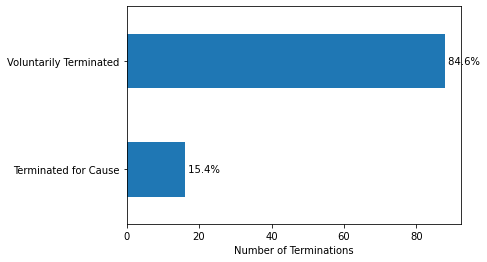

In [655]:
ax = summary['count'].sort_values().plot(kind='barh')
total = summary['count'].sum()

for i, v in enumerate(summary['count'].sort_values()):
    pct = v / total * 100
    ax.text(v, i, f' {pct:.1f}%', va='center')

ax.set_xlabel('Number of Terminations')
ax.set_ylabel('')

<u>**Insight 1:**</u> The majority of employee exits (84.6%) are voluntary, indicating that attrition within the organization is largely driven by employee decisions rather than disciplinary or performance-related actions. This suggests that retention-related factors—such as career development, compensation, work–life balance, and managerial effectiveness—are likely the primary drivers of workforce turnover.

To validate and contextualize the insights above, the following section presents a deeper analysis of individual termination reasons.

In [656]:
termination_table = (
    df[df['Termd'] == 1]
    .pivot_table(
        index='TermReason',
        columns='EmploymentStatus',
        values='Termd',
        aggfunc='count',
        fill_value=0
    )
)
termination_table['Total'] = termination_table.sum(axis=1)
cols = ['Total'] + [c for c in termination_table.columns if c != 'Total']
termination_table = termination_table[cols]
termination_table

EmploymentStatus,Total,Terminated for Cause,Voluntarily Terminated
TermReason,,,
Another position,20,0,20
Fatal attraction,1,1,0
Learned that he is a gangster,1,1,0
attendance,7,6,1
career change,9,0,9
gross misconduct,1,1,0
hours,8,0,8
maternity leave - did not return,3,0,3
medical issues,3,0,3


<u>Why Do Performance and Attendance Appear in Both Voluntary and Involuntary Terminations?</u>

At first glance, it may seem counterintuitive that **performance** and **attendance** are associated with both *Voluntarily Terminated* and *Terminated for Cause* employees. However, this is not necessarily a data issue.

These categories can legitimately overlap because the same underlying issue may lead to different exit classifications, depending on how the separation is handled administratively.

- **TermReason** describes the *primary issue* that led to the employee’s separation.
- **EmploymentStatus** describes *how* the employee officially exited the organization.

Attendance Example:
- **Voluntarily Terminated**  
  An employee resigns after repeated attendance issues, before formal disciplinary action is taken.
- **Terminated for Cause**  
  An employee is formally dismissed due to attendance violations (e.g., repeated no-call, no-show incidents).

Performance Example:
- **Voluntarily Terminated**  
  An employee resigns following poor performance reviews or while undergoing a Performance Improvement Plan (PIP).
- **Terminated for Cause**  
  An employee is terminated by the employer due to sustained underperformance.

<u>Termination Reason Clustering</u>

The raw `TermReason` variable contains many granular and highly specific labels, which makes pattern recognition and higher-level analysis difficult. Below step **consolidates individual termination reasons into broader, interpretable clusters** so they can be used effectively in downstream analyses (e.g., voluntary vs involuntary exits, managerial patterns, or organizational drivers of attrition).

A mapping dictionary is created to group similar termination reasons into meaningful categories:

- **Career Growth & Mobility**  
  (e.g., another position, career change, relocation)
- **Compensation & Benefits**  
  (e.g., more money)
- **Work–Life Balance**  
  (e.g., unhappy, working hours)
- **Performance & Conduct**  
  (e.g., performance issues, attendance, misconduct)
- **Personal / Life Events**  
  (e.g., medical issues, military service, maternity)
- **Education & Retirement**  
  (e.g., return to school, retiring)

This clustering reduces noise while preserving the underlying narrative behind employee exits.

In [657]:
termreason_cluster_map = {
    # Career Growth & Mobility
    "Another position": "Career Growth & Mobility",
    "career change": "Career Growth & Mobility",
    "relocation out of area": "Career Growth & Mobility",
    
    # Compensation & Benefits
    "more money": "Compensation & Benefits",
    
    # Work–Life Balance & Satisfaction
    "hours": "Work–Life Balance",
    "unhappy": "Work–Life Balance",
    
    # Performance & Conduct
    "performance": "Performance & Conduct",
    "attendance": "Performance & Conduct",
    "no-call, no-show": "Performance & Conduct",
    "gross misconduct": "Performance & Conduct",
    "Fatal attraction": "Performance & Conduct",
    "Learned that he is a gangster": "Performance & Conduct",
    
    # Personal / Life Events
    "medical issues": "Personal / Life Events",
    "military": "Personal / Life Events",
    "maternity leave - did not return": "Personal / Life Events",
    
    # Education & Retirement
    "return to school": "Education & Retirement",
    "retiring": "Education & Retirement"
}
df["TermReasonCluster"] = df["TermReason"].map(termreason_cluster_map)
clustered_table = (
    df[df["Termd"] == 1]
    .groupby(["TermReasonCluster", "EmploymentStatus"])
    .size()
    .unstack(fill_value=0)
    .sort_values(by=["Voluntarily Terminated", "Terminated for Cause"], ascending=False)
)
clustered_table["Total"] = clustered_table.sum(axis=1)
cols = ["Total"] + [c for c in clustered_table.columns if c != "Total"]
clustered_table = clustered_table[cols]
clustered_table

EmploymentStatus,Total,Terminated for Cause,Voluntarily Terminated
TermReasonCluster,,,
Career Growth & Mobility,34,0,34
Work–Life Balance,22,0,22
Compensation & Benefits,11,0,11
Personal / Life Events,10,0,10
Education & Retirement,9,0,9
Performance & Conduct,18,16,2


<u>**Insight 2:**</u> Employee attrition is largely voluntary, driven by factors like career growth, work–life balance, compensation, and personal reasons, while involuntary exits are mostly limited to performance or conduct issues. This shows that departures are not due to widespread performance problems but reflect employees choosing to leave when expectations are unmet. From an HR perspective, this means retention risks can be addressed through better policies, leadership, and job design, while performance management is targeted and not overly punitive.

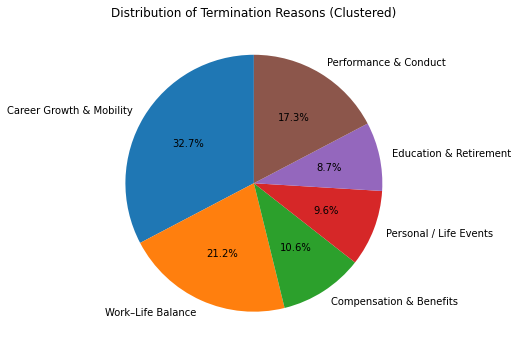

In [658]:
plt.figure(figsize=(7, 7))

plt.pie(
    clustered_table["Total"],
    labels=clustered_table.index,
    autopct="%1.1f%%",
    startangle=90
)

plt.title("Distribution of Termination Reasons (Clustered)")
plt.tight_layout()
plt.show()

<u>**Insight 3:**</u> Attrition is driven mainly by career growth, work–life balance, and compensation factors rather than performance or disciplinary issues. Career mobility is the largest contributor, while workload, schedule pressures, and market-aligned pay gaps also play a significant role. Performance- or conduct-related exits are rare, indicating that the workforce is generally capable, and the organization’s attrition challenge is structural and strategic rather than corrective.

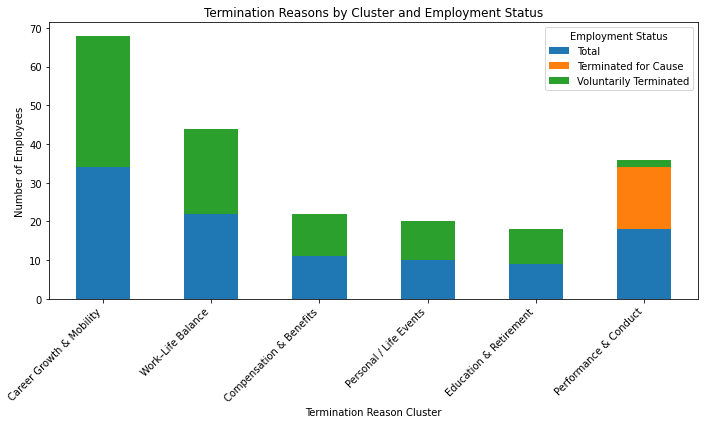

In [659]:
clustered_table.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

plt.title("Termination Reasons by Cluster and Employment Status")
plt.xlabel("Termination Reason Cluster")
plt.ylabel("Number of Employees")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Employment Status")
plt.tight_layout()
plt.show()

## Analysis 2 — Department-Level Attrition Patterns

This section examines whether attrition patterns differ across departments. The primary objective is to identify **which departments experience the highest turnover rates** and assess whether attrition is concentrated in specific parts of the organization.

In [660]:
df["Department"].value_counts()

Production              209
IT/IS                    50
Sales                    31
Software Engineering     11
Admin Offices             9
Executive Office          1
Name: Department, dtype: int64

In [661]:
dept_headcount = (
    df.groupby("Department")
      .size()
      .rename("Total Employees")
)
dept_terminations = (
    df[df["Termd"] == 1]
    .groupby("Department")
    .size()
    .rename("Terminations")
)
dept_attrition = (
    pd.concat([dept_headcount, dept_terminations], axis=1)
    .fillna(0)
)
dept_attrition["AttritionRate"] = (
    dept_attrition["Terminations"] / dept_attrition["Total Employees"]
)
dept_attrition = dept_attrition.sort_values(
    by="AttritionRate",
    ascending=False
)

dept_attrition

,Total Employees,Terminations,AttritionRate
Production,209,83.0,0.397129
Software Engineering,11,4.0,0.363636
Admin Offices,9,2.0,0.222222
IT/IS,50,10.0,0.200000
Sales,31,5.0,0.161290
Executive Office,1,0.0,0.000000


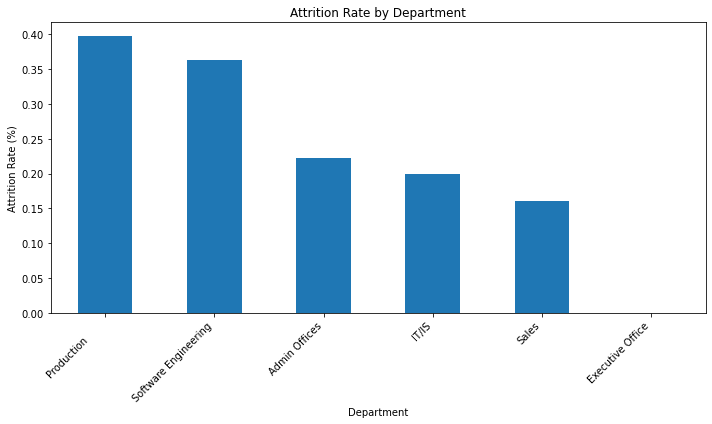

In [662]:
dept_attrition["AttritionRate"].plot(
    kind="bar",
    figsize=(10, 6)
)

plt.title("Attrition Rate by Department")
plt.xlabel("Department")
plt.ylabel("Attrition Rate (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

<u>**Insight 4:**</u> Attrition is disproportionately concentrated in the Production function, which exhibits both the highest number of exits and the highest attrition rate. While smaller teams such as Software Engineering show elevated attrition rates, their limited headcount warrants cautious interpretation. Overall, the findings suggest that retention risks are most acute in operational roles, indicating a need for targeted workforce and retention strategies rather than organization-wide interventions.

In [663]:
terminated = df[df['Termd'] == 1].copy()
dept_split = (
    terminated
    .groupby(['Department', 'EmploymentStatus'])
    .size()
    .unstack(fill_value=0)
)
dept_split["Total"] = dept_split.sum(axis=1)
cols = ["Total"] + [c for c in dept_split.columns if c != "Total"]
dept_split = dept_split[cols]
dept_split

EmploymentStatus,Total,Terminated for Cause,Voluntarily Terminated
Department,,,
Admin Offices,2,1,1
IT/IS,10,4,6
Production,83,8,75
Sales,5,2,3
Software Engineering,4,1,3


In [664]:
dept_rate = dept_split.drop(columns=["Total"]).div(dept_split["Total"], axis=0)
dept_rate

EmploymentStatus,Terminated for Cause,Voluntarily Terminated
Department,,
Admin Offices,0.500000,0.500000
IT/IS,0.400000,0.600000
Production,0.096386,0.903614
Sales,0.400000,0.600000
Software Engineering,0.250000,0.750000


<u>**Insight 5:**</u> Across all departments, voluntary termination is the dominant form of attrition, particularly in Production, where over 90% of exits are employee-initiated.

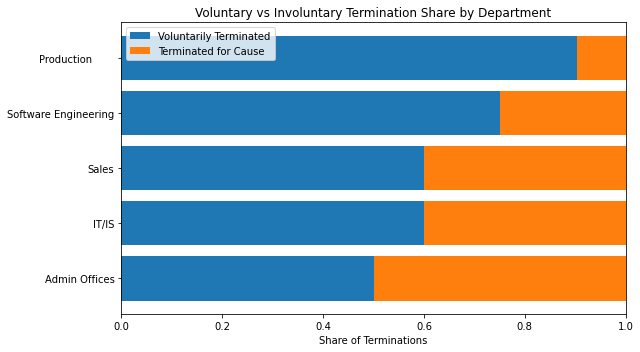

In [665]:
dept_prop_sorted = dept_rate.sort_values(
    by="Terminated for Cause", ascending=False
)

plt.figure(figsize=(9, 5))

plt.barh(
    dept_prop_sorted.index,
    dept_prop_sorted["Voluntarily Terminated"]
)
plt.barh(
    dept_prop_sorted.index,
    dept_prop_sorted["Terminated for Cause"],
    left=dept_prop_sorted["Voluntarily Terminated"]
)

plt.xlabel("Share of Terminations")
plt.title("Voluntary vs Involuntary Termination Share by Department")
plt.xlim(0, 1)
plt.legend(["Voluntarily Terminated", "Terminated for Cause"])

# Force white background (important for reports)
plt.gca().set_facecolor("white")
plt.gcf().set_facecolor("white")

plt.tight_layout()
plt.show()

## Analysis 3 — Patterns on Attrition based on Manager

This analysis explores how employee exits vary across managers, aiming to pinpoint which managers experience the highest turnover within their teams. Understanding these patterns helps reveal potential leadership or team management issues and answers the question, *"Are departures concentrated under certain managers?"*

Before diving into manager-level attrition patterns, we need to decide which variable to use: `ManagerName` or `ManagerID`.

In [666]:
df["ManagerName"].value_counts()

Michael Albert        22
Elijiah Gray          22
Kissy Sullivan        22
Brannon Miller        22
Kelley Spirea         22
Ketsia Liebig         21
Webster Butler        21
David Stanley         21
Amy Dunn              21
Janet King            19
Simon Roup            17
Peter Monroe          14
John Smith            14
Lynn Daneault         13
Alex Sweetwater        9
Brian Champaigne       8
Jennifer Zamora        7
Brandon R. LeBlanc     7
Eric Dougall           4
Debra Houlihan         3
Board of Directors     2
Name: ManagerName, dtype: int64

In [667]:
df["ManagerID"].value_counts()

18.0    22
20.0    22
16.0    22
12.0    22
14.0    21
39.0    21
11.0    21
19.0    21
22.0    21
2.0     19
4.0     17
7.0     14
17.0    14
21.0    13
10.0     9
13.0     8
5.0      7
1.0      6
6.0      4
15.0     3
9.0      2
3.0      1
30.0     1
Name: ManagerID, dtype: int64

We opted for `ManagerName` because value counts differ between the two. A single manager may have multiple IDs over time due to promotions or repositioning. Since our goal is to identify which manager's team experiences the highest turnover, using `ManagerName` provides a clearer and more consistent view of attrition under each manager.

In [668]:
manager_team_size = (
    df.groupby("ManagerName")
      .size()
      .rename("Team Size")
)
manager_terminations = (
    df[df["Termd"] == 1]
    .groupby("ManagerName")
    .size()
    .rename("Terminations")
)
manager_attrition = (
    pd.concat([manager_team_size, manager_terminations], axis=1)
    .fillna(0)
)
manager_attrition["Terminations"] = manager_attrition["Terminations"].astype(int)
manager_attrition["Attrition Rate"] = (
    manager_attrition["Terminations"] / manager_attrition["Team Size"]
)

# manager_attrition["AttritionRatePct"] = manager_attrition["AttritionRate"] * 100

MIN_TEAM_SIZE = 1

manager_attrition_filtered = (
    manager_attrition[manager_attrition["Team Size"] >= MIN_TEAM_SIZE]
    .sort_values("Attrition Rate", ascending=False)
)

manager_attrition_filtered

,Team Size,Terminations,Attrition Rate
Webster Butler,21,13,0.619048
Amy Dunn,21,13,0.619048
Kissy Sullivan,22,12,0.545455
Simon Roup,17,8,0.470588
Michael Albert,22,9,0.409091
Elijiah Gray,22,8,0.363636
Debra Houlihan,3,1,0.333333
Alex Sweetwater,9,3,0.333333
Janet King,19,6,0.315789
David Stanley,21,6,0.285714


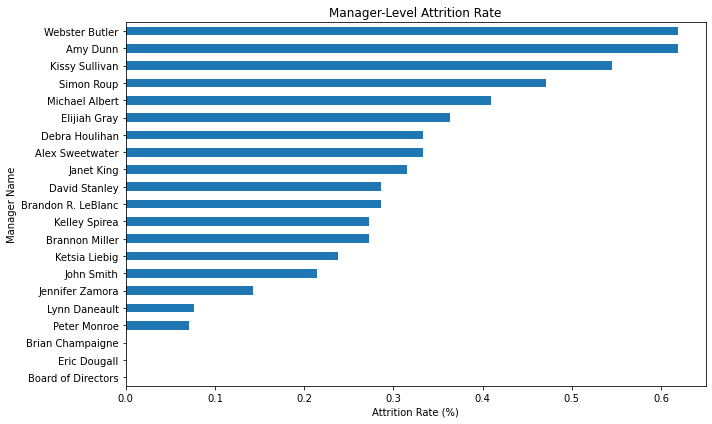

In [669]:
manager_attrition_filtered["Attrition Rate"].sort_values().plot(
    kind="barh",
    figsize=(10, 6)
)

plt.title("Manager-Level Attrition Rate")
plt.xlabel("Attrition Rate (%)")
plt.ylabel("Manager Name")
plt.tight_layout()
plt.show()

<u>**Insight 6:**</u> Manager-level analysis reveals that attrition is concentrated among a few team leaders. Webster Butler and Amy Dunn’s teams, each losing over 60% of their employees, along with Kissy Sullivan’s team at 55%, indicate a significant retention challenge at the team level. Several other managers experience moderate attrition (~30–40%), while a number of managers maintain near-zero attrition. This pattern suggests that retention risks are manager- and team-specific, rather than organization-wide, and targeted interventions at the team level may be the most effective approach to reduce voluntary turnover.

In [670]:
terminated = df[df['Termd'] == 1].copy()

manager_split = (
    terminated
    .groupby(['ManagerName', 'EmploymentStatus'])
    .size()
    .unstack(fill_value=0)
)

manager_split = manager_split[manager_split.sum(axis=1) >= 1]

manager_rate = manager_split.div(manager_split.sum(axis=1), axis=0)
manager_rate.sort_values(by='Voluntarily Terminated', ascending=False)

EmploymentStatus,Terminated for Cause,Voluntarily Terminated
ManagerName,,
Webster Butler,0.000000,1.000000
Peter Monroe,0.000000,1.000000
Brannon Miller,0.000000,1.000000
David Stanley,0.000000,1.000000
Debra Houlihan,0.000000,1.000000
Jennifer Zamora,0.000000,1.000000
Amy Dunn,0.000000,1.000000
Michael Albert,0.111111,0.888889
Elijiah Gray,0.125000,0.875000


<u>**Insight 7:**</u> Analysis of manager-level terminations by type shows that attrition is predominantly voluntary, with seven managers experiencing 100% voluntary exits. Several other managers have a mix of voluntary and involuntary terminations, indicating both retention challenges and targeted performance management. Only one manager, Lynn Daneault, had exclusively involuntary exits, highlighting an isolated performance or disciplinary case. These findings suggest that retention interventions should be focused at the manager/team level, while performance management practices appear to be applied selectively and appropriately.

## Analysis 4 — Attrition Patterns by Performance Score

This analysis examines how employee exits relate to performance scores. The main objective is to identify which performance categories experience the highest turnover, helping answer the question: *"Which performance score is associated with the highest attrition rate?"*

In [671]:
df["PerfScoreID"].value_counts()

3    243
4     37
2     18
1     13
Name: PerfScoreID, dtype: int64

In [672]:
df["PerformanceScore"].value_counts()

Fully Meets          243
Exceeds               37
Needs Improvement     18
PIP                   13
Name: PerformanceScore, dtype: int64

`PerfScoreID` represents the same performance categories as `PerformanceScore`, encoded numerically.

The mapping is as follows:

- **1** — PIP (Performance Improvement Plan)
- **2** — Needs Improvement
- **3** — Fully Meets
- **4** — Exceeds

But, before doing the analysis, we should see the cleaness of the data.

In [673]:
df.groupby('PerfScoreID')['PerformanceScore'].nunique()

PerfScoreID
1    2
2    1
3    2
4    1
Name: PerformanceScore, dtype: int64

In [674]:
df.groupby('PerformanceScore')['PerfScoreID'].nunique()

PerformanceScore
Exceeds              1
Fully Meets          2
Needs Improvement    1
PIP                  2
Name: PerfScoreID, dtype: int64

In [675]:
problem_ids = (
    df.groupby('PerfScoreID')['PerformanceScore']
      .nunique()
      .loc[lambda x: x > 1]
      .index
)

(
    df[df['PerfScoreID'].isin([1, 3])]
    .groupby(['PerfScoreID', 'PerformanceScore'])
    .size()
    .reset_index(name='count')
    .sort_values(['PerfScoreID', 'count'], ascending=[True, False])
)


,PerfScoreID,PerformanceScore,count
1,1,PIP,12
0,1,Fully Meets,1
2,3,Fully Meets,242
3,3,PIP,1


There is a data error where 1 is incorrectly assigned as Fully Meets instead of PIP, and 3 is assigned as PIP instead of Fully Meets. Therefore, we should reassign these incorrect values to their correct ones.

In [676]:
df.loc[
    (df['PerfScoreID'] == 1) & (df['PerformanceScore'] == 'Fully Meets'),
    'PerformanceScore'
] = 'PIP'

df.loc[
    (df['PerfScoreID'] == 3) & (df['PerformanceScore'] == 'PIP'),
    'PerformanceScore'
] = 'Fully Meets'


In [677]:
df.groupby('PerfScoreID')['PerformanceScore'].nunique()

PerfScoreID
1    1
2    1
3    1
4    1
Name: PerformanceScore, dtype: int64

Now, each `PerfScoreID` correctly corresponds to its respective `PerformanceScore`.

In [678]:
perf_attrition = (
    df
    .groupby(['PerfScoreID', 'PerformanceScore'])
    .agg(
        total_employees=('EmpID', 'count'),
        terminations=('Termd', 'sum')
    )
    .reset_index()
)
perf_attrition['attrition_rate'] = (
    perf_attrition['terminations']
    / perf_attrition['total_employees']
)
perf_attrition = perf_attrition.sort_values('PerfScoreID')
perf_attrition

,PerfScoreID,PerformanceScore,total_employees,terminations,attrition_rate
0,1,PIP,13,4,0.307692
1,2,Needs Improvement,18,10,0.555556
2,3,Fully Meets,243,82,0.337449
3,4,Exceeds,37,8,0.216216


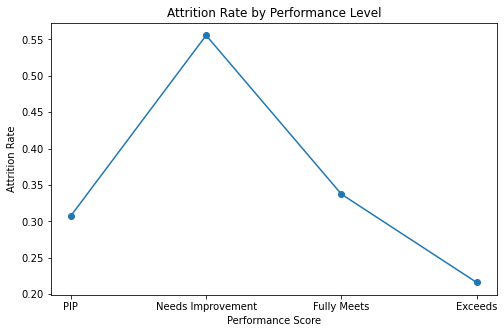

In [679]:
plt.figure(figsize=(8, 5))

plt.plot(
    perf_attrition['PerformanceScore'],
    perf_attrition['attrition_rate'],
    marker='o'
)

plt.xlabel('Performance Score')
plt.ylabel('Attrition Rate')
plt.title('Attrition Rate by Performance Level')

plt.show()

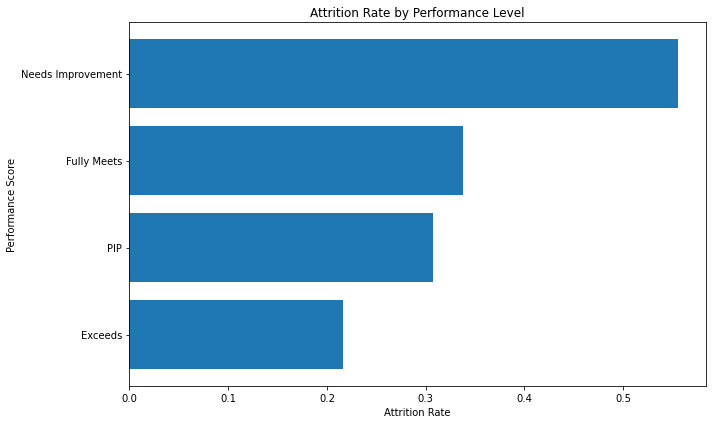

In [680]:
perf_attrition_sorted = perf_attrition.sort_values(
    'attrition_rate'
)

plt.figure(figsize=(10, 6))

plt.barh(
    perf_attrition_sorted['PerformanceScore'],
    perf_attrition_sorted['attrition_rate']
)

plt.xlabel('Attrition Rate')
plt.ylabel('Performance Score')
plt.title('Attrition Rate by Performance Level')

plt.tight_layout()
plt.show()

<u>**Insight 8:**</u> Attrition risk is highest for low performers, but in absolute numbers, most employees leaving are average performers. This signals both a performance management opportunity and a retention challenge for the middle performers.

In [681]:
exit_by_perf = pd.crosstab(
    df['PerformanceScore'],
    df['EmploymentStatus'],
    values=df['EmpID'],
    aggfunc='count'
)
exit_by_perf

EmploymentStatus,Active,Terminated for Cause,Voluntarily Terminated
PerformanceScore,,,
Exceeds,29,1,7
Fully Meets,161,9,73
Needs Improvement,8,5,5
PIP,9,1,3


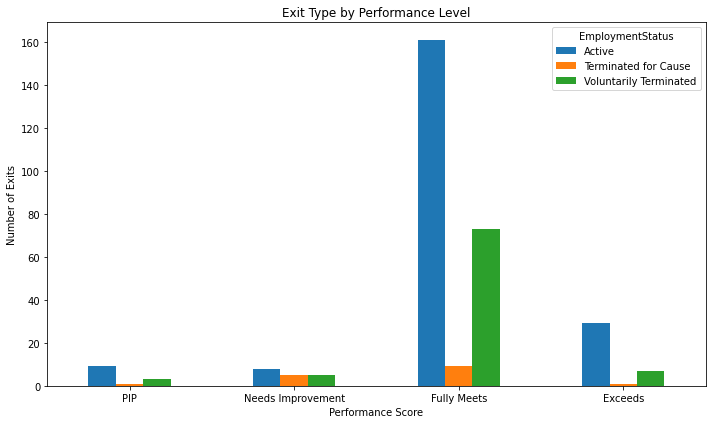

In [682]:
exit_by_perf = exit_by_perf.fillna(0)
exit_by_perf = exit_by_perf.loc[perf_attrition['PerformanceScore']]

exit_by_perf.plot(
    kind='bar',
    figsize=(10, 6)
)

plt.xlabel('Performance Score')
plt.ylabel('Number of Exits')
plt.title('Exit Type by Performance Level')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

<u>**Insight 9:**</u> Voluntary exits are most common among average and high performers, whereas involuntary exits occur mainly for low performers. Middle performers account for the largest share of voluntary departures, making them a key focus for retention efforts to reduce overall attrition. Meanwhile, employees on PIPs or rated as Needs Improvement show higher terminations for cause, indicating that performance issues are being actively managed.

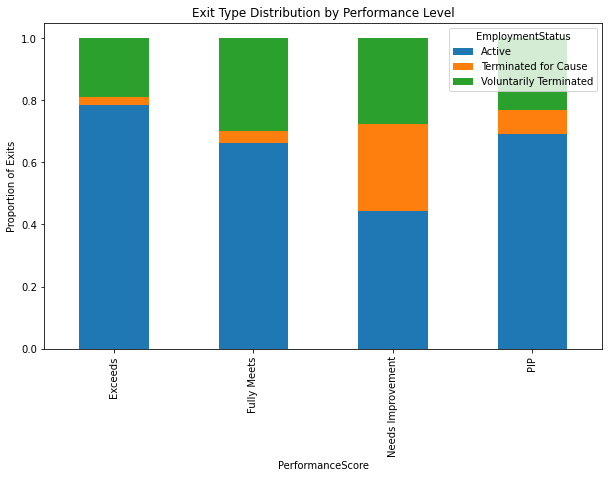

In [683]:
exit_by_perf_prop = pd.crosstab(
    df['PerformanceScore'],
    df['EmploymentStatus'],
    normalize='index'
)

exit_by_perf_prop.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

plt.ylabel('Proportion of Exits')
plt.title('Exit Type Distribution by Performance Level')
plt.show()

## Analysis 5 — Attrition Patterns by Recruitment Source

This analysis examines turnover rates across different recruitment sources. The goal is to provide insights that can inform job announcement strategies and support the recruitment team in optimizing sourcing efforts.

In [684]:
df["RecruitmentSource"].value_counts()

Indeed                     87
LinkedIn                   76
Google Search              49
Employee Referral          31
Diversity Job Fair         29
CareerBuilder              23
Website                    13
Other                       2
On-line Web application     1
Name: RecruitmentSource, dtype: int64

Before conducting the analysis, we first check the cleanliness of the data, specifically to see if there are any discrepancies between `Employee_Name` and `EmpID`.

In [685]:
df["Employee_Name"].value_counts()

Ndzi, Colombui        1
Bachiochi, Linda      1
Leach, Dallas         1
Voldemort, Lord       1
Hitchcock, Alfred     1
                     ..
Winthrop, Jordan      1
Clayton, Rick         1
Forrest, Alex         1
Lecter, Hannibal      1
Houlihan, Debra       1
Name: Employee_Name, Length: 311, dtype: int64

In [686]:
df["EmpID"].value_counts()

10239    1
10034    1
10027    1
10028    1
10029    1
        ..
10136    1
10137    1
10138    1
10139    1
10240    1
Name: EmpID, Length: 311, dtype: int64

The data is clean and shows no discrepancies. We can now proceed with the analysis.

In [687]:
recruitment_attrition = (
    df
    .groupby('RecruitmentSource')
    .agg(
        total_hires=('EmpID', 'count'),
        terminations=('Termd', 'sum')
    )
    .reset_index()
)
recruitment_attrition['Attrition Rate'] = (
    recruitment_attrition['terminations']
    / recruitment_attrition['total_hires']
)
recruitment_attrition = recruitment_attrition[
    recruitment_attrition['total_hires'] >= 10
]
recruitment_attrition = recruitment_attrition.sort_values(
    by='Attrition Rate',
    ascending=False
)
recruitment_attrition

,RecruitmentSource,total_hires,terminations,Attrition Rate
3,Google Search,49,30,0.612245
1,Diversity Job Fair,29,16,0.551724
0,CareerBuilder,23,11,0.478261
4,Indeed,87,21,0.241379
5,LinkedIn,76,18,0.236842
2,Employee Referral,31,5,0.161290
8,Website,13,1,0.076923


<u>**Insight 10:**</u> Employees hired through referrals or company website tend to stay longer, while hires from Google Search and Diversity Job Fairs are more likely to leave. HR should prioritize referral programs and trusted recruitment channels to improve retention, and investigate why certain sources bring higher-risk employees.

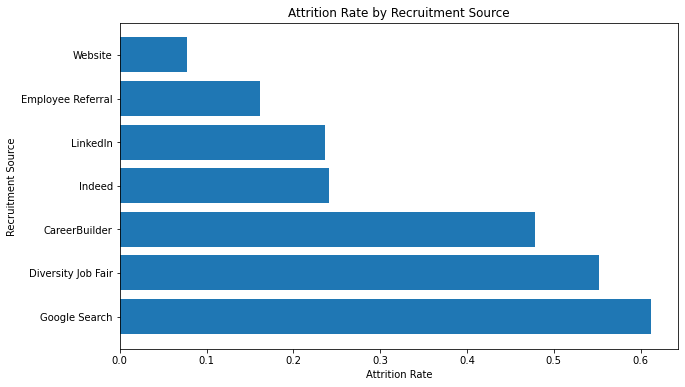

In [688]:
plt.figure(figsize=(10, 6))
plt.barh(
    recruitment_attrition['RecruitmentSource'],
    recruitment_attrition['Attrition Rate']
)

plt.xlabel('Attrition Rate')
plt.ylabel('Recruitment Source')
plt.title('Attrition Rate by Recruitment Source')

plt.show()

In [689]:
recruitment_crosstab = pd.crosstab(
    df['RecruitmentSource'],
    df['EmploymentStatus'],
    values=df['EmpID'],
    aggfunc='count'
).fillna(0).astype(int)

recruitment_crosstab

EmploymentStatus,Active,Terminated for Cause,Voluntarily Terminated
RecruitmentSource,,,
CareerBuilder,12,1,10
Diversity Job Fair,13,0,16
Employee Referral,26,3,2
Google Search,19,5,25
Indeed,66,4,17
LinkedIn,58,3,15
On-line Web application,0,0,1
Other,1,0,1
Website,12,0,1


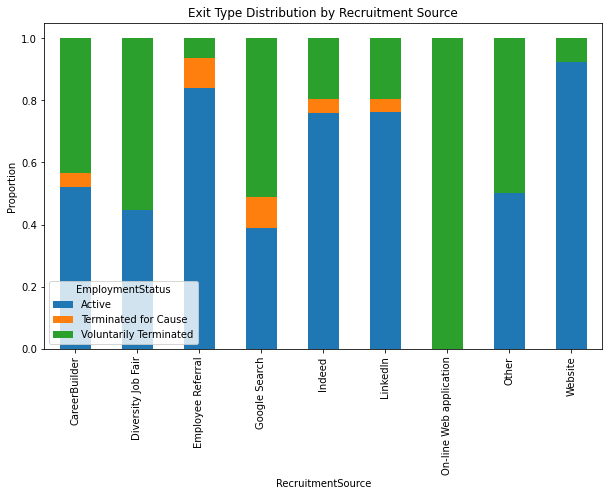

In [690]:
exit_type = pd.crosstab(
    df['RecruitmentSource'],
    df['EmploymentStatus'],
    normalize='index'
)

exit_type.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6)
)

plt.ylabel('Proportion')
plt.title('Exit Type Distribution by Recruitment Source')
plt.show()

<u>**Insight 11:**</u> Employees hired through Google Search, Diversity Job Fairs, and CareerBuilder are more likely to leave voluntarily, indicating potential misalignment with job expectations or culture. In contrast, Employee Referrals and website hires show strong retention, with most remaining active and very few involuntary exits.

## Other Analyses

This section is created for exploratory purposes and just for fun.

In [691]:
# Shows how many employee that a manager have, including the salaries
df.groupby('ManagerName').agg({
    'EmpID': 'count',
    'Salary': 'mean'
    })

,EmpID,Salary
ManagerName,,
Alex Sweetwater,9,98203.222222
Amy Dunn,21,57881.857143
Board of Directors,2,174675.500000
Brandon R. LeBlanc,7,64818.571429
Brannon Miller,22,60095.454545
Brian Champaigne,8,98319.750000
David Stanley,21,56938.571429
Debra Houlihan,3,69240.000000
Elijiah Gray,22,60635.954545


Check about the correlation of the amount of successor with the `Performance Score` or even `Salary`

In [692]:
# Average Salary based on the Engagement Survey and Performance Score
df.groupby(["PerformanceScore", "EngagementSurvey"])["Salary"].mean()

PerformanceScore  EngagementSurvey
Exceeds           3.60                 63353.0
                  3.70                170500.0
                  3.90                 57815.0
                  4.00                 52984.0
                  4.10                 63777.5
                                        ...   
PIP               2.33                 52674.0
                  2.40                 64021.0
                  3.00                 60515.0
                  3.20                 48513.0
                  4.30                 56991.0
Name: Salary, Length: 144, dtype: float64

# **03 Recommendations and Improvements**

### Recommendations for the Human Resources Team

This project aims to gain insights from employee data in the HRIS so that HR policies can be data-driven and help achieve organizational success.

Before assigning recommendations to the HR sub-teams, let’s list the insights from our analysis.
1. The majority of employee exits (84.6%) are voluntary, indicating that attrition within the organization is largely driven by employee decisions rather than disciplinary or performance-related actions. This suggests that retention-related factors—such as career development, compensation, work–life balance, and managerial effectiveness—are likely the primary drivers of workforce turnover.
2. Employee attrition is largely voluntary, driven by factors like career growth, work–life balance, compensation, and personal reasons, while involuntary exits are mostly limited to performance or conduct issues. This shows that departures are not due to widespread performance problems but reflect employees choosing to leave when expectations are unmet. From an HR perspective, this means retention risks can be addressed through better policies, leadership, and job design, while performance management is targeted and not overly punitive.
3. Attrition is driven mainly by career growth, work–life balance, and compensation factors rather than performance or disciplinary issues. Career mobility is the largest contributor, while workload, schedule pressures, and market-aligned pay gaps also play a significant role. Performance- or conduct-related exits are rare, indicating that the workforce is generally capable, and the organization’s attrition challenge is structural and strategic rather than corrective.
4. Attrition is disproportionately concentrated in the Production function, which exhibits both the highest number of exits and the highest attrition rate. While smaller teams such as Software Engineering show elevated attrition rates, their limited headcount warrants cautious interpretation. Overall, the findings suggest that retention risks are most acute in operational roles, indicating a need for targeted workforce and retention strategies rather than organization-wide interventions.
5. Across all departments, voluntary termination is the dominant form of attrition, particularly in Production, where over 90% of exits are employee-initiated.
6. Manager-level analysis reveals that attrition is concentrated among a few team leaders. Webster Butler and Amy Dunn’s teams, each losing over 60% of their employees, along with Kissy Sullivan’s team at 55%, indicate a significant retention challenge at the team level. Several other managers experience moderate attrition (~30–40%), while a number of managers maintain near-zero attrition. This pattern suggests that retention risks are manager- and team-specific, rather than organization-wide, and targeted interventions at the team level may be the most effective approach to reduce voluntary turnover.
7. Analysis of manager-level terminations by type shows that attrition is predominantly voluntary, with seven managers experiencing 100% voluntary exits. Several other managers have a mix of voluntary and involuntary terminations, indicating both retention challenges and targeted performance management. Only one manager, Lynn Daneault, had exclusively involuntary exits, highlighting an isolated performance or disciplinary case. These findings suggest that retention interventions should be focused at the manager/team level, while performance management practices appear to be applied selectively and appropriately.
8. Attrition risk is highest for low performers, but in absolute numbers, most employees leaving are average performers. This signals both a performance management opportunity and a retention challenge for the middle performers.
9. Voluntary exits are most common among average and high performers, whereas involuntary exits occur mainly for low performers. Middle performers account for the largest share of voluntary departures, making them a key focus for retention efforts to reduce overall attrition. Meanwhile, employees on PIPs or rated as Needs Improvement show higher terminations for cause, indicating that performance issues are being actively managed.
10. Employees hired through referrals or company website tend to stay longer, while hires from Google Search and Diversity Job Fairs are more likely to leave. HR should prioritize referral programs and trusted recruitment channels to improve retention, and investigate why certain sources bring higher-risk employees.
11. Employees hired through Google Search, Diversity Job Fairs, and CareerBuilder are more likely to leave voluntarily, indicating potential misalignment with job expectations or culture. In contrast, Employee Referrals and website hires show strong retention, with most remaining active and very few involuntary exits.

Now, based on the 11 key insights above, we can provide these suggestions and recommendations for each HR sub-team.
1. **Recruitment and Talent Acquisition**
    - Prioritize recruitment channels that have historically produced higher retention, such as employee referrals and company website hires.
    - Re-evaluate or optimize recruitment sources with higher voluntary attrition (e.g., Google Search, Diversity Job Fairs, CareerBuilder) to ensure better alignment with organizational culture and role expectations.
    - Track retention by recruitment source continuously to inform strategic hiring policies.
2. **Compensation and Benefits**
    - Review compensation structures to ensure they are market-aligned, addressing pay gaps that may contribute to voluntary attrition.
    - Introduce or enhance benefits that support work-life balance, e.g., flexible schedules, wellness programs, or additional leave policies.
    - Align rewards and recognition programs with career progression and contribution to improve retention.
3. **Performance Management** 
    - Maintain selective performance management for low performers through PIPs and performance monitoring, ensuring underperformance is addressed fairly.
    - Use performance data to identify middle performers at risk of voluntary exit and apply targeted engagement strategies or career development opportunities.
    - Ensure managers are trained to apply performance management consistently and constructively while focusing on retention rather than punitive measures alone.
4. **Learning and Development**
    - Implement career growth and mobility programs, focusing on employees who are leaving due to lack of development opportunities.
    - Develop leadership and coaching programs for managers with high team attrition to improve managerial effectiveness.
    - Provide skill development and mentorship for middle performers to increase engagement and retention.
    - Ensure onboarding programs communicate career paths and growth opportunities clearly to new hires.
5. **Employee Relations and Engagement**
    - Focus engagement initiatives on high-attrition teams and departments, particularly Production.
    - Conduct manager-specific retention interventions, coaching managers like Webster Butler, Amy Dunn, and Kissy Sullivan to improve team satisfaction.
    - Address work-life balance concerns and job design improvements to reduce voluntary exits.
    - Regularly gather feedback through surveys or focus groups to identify retention risks and satisfaction gaps.
    - Recognize and reward middle and high performers to improve morale and reduce voluntary attrition.
6. **HR Strategy**
    - Develop targeted retention strategies for departments and teams with high voluntary attrition.
    - Align compensation, benefits, career development, and engagement initiatives to address structural attrition drivers.
    - Use data-driven insights to continuously monitor and adjust HR policies for recruitment, retention, and performance.
    - Design managerial coaching and leadership interventions where team-specific attrition is high.
    - Incorporate recruitment source performance into strategic hiring decisions to optimize long-term retention.

In conclusion, the above brief policy is the output of this project. While it is not perfect, it can serve as motivation or as a reference/background.

## Improvements for the Project

Below is my personal advice for anyone who wishes to use or further develop this project in the future.
1. **Deepen the Analysis**
    - Current status: Insights are largely descriptive and based on observed patterns.
    - Improvement: Conduct more granular, personal-level analysis, such as examining individual employee trajectories, manager impact, or team dynamics, to validate patterns and ensure insights are robust and actionable.
    - Why: Avoids overgeneralization and ensures HR interventions target real issues.
2. **Expand Variables**
    - Current status: Analysis covers a limited set of factors.
    - Improvement: Explore additional variables such as salary, sex, age, marital status, engagement survey, and others.
    - Why: Helps identify hidden drivers of attrition or engagement, allowing for more targeted HR strategies.
3. **Advance Analytics Approach**
    - Current status: Descriptive analytics only (counts, proportions, averages).
    - Improvement: Move toward diagnostic analytics (e.g., why certain attrition patterns occur, correlation analysis) and predictive analytics (e.g., who is at risk of leaving using attrition modeling or machine learning).
    - Why: Provides actionable foresight for HR teams to proactively implement policies and interventions instead of just observing past trends.